Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

Importing Dataset

In [19]:
url="https://raw.githubusercontent.com/VinayakaShivakumar/ML_Dataset/main/Linear_regression_dataset/Car_features_and_MSRP.csv"
df=pd.read_csv(url)

Reading Dataset

In [20]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Checking number of rows and columns of data set

In [25]:
# extracting number of rows from the Dataframe
row = len(df)

# extracting number of columns from the Dataframe
col = len(df.columns)
 
# printing
print(f'Dimension of the Dataframe is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}')

Dimension of the Dataframe is: (11914, 16)
Number of Rows are: 11914
Number of Columns are: 16


Viewing car companies with car count

In [26]:
print(df['Make'].value_counts())

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

Since Chevrolet has the highest car count, we are considering this car company and only engine type for training the model to predict the price of the car

In [32]:
new_df = df[df['Make']=='Chevrolet']

# Viewing the new dataset shape
print("Shape of Chevrolet dataset")
print(new_df.shape) 

# Checking for Null values
print(new_df.isnull().sum())

# Deleting the rows which have Empty cells
new_df = new_df.dropna() 

Shape of Chevrolet dataset
(1123, 16)
Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              6
Engine Cylinders       2
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      501
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64


In [31]:
#Rechecking for Null or Empty cell
print("Checking Null values in dataset")
print(new_df.isnull().sum())

Checking Null values in dataset
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [33]:
# Checking the random dataset sample
new_df.sample(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
9623,Chevrolet,Silverado 1500,2017,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,rear wheel drive,2.0,Flex Fuel,Large,Regular Cab Pickup,24,18,1385,33860
9557,Chevrolet,Silverado 1500,2016,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,four wheel drive,2.0,Flex Fuel,Large,Regular Cab Pickup,22,17,1385,38590
9578,Chevrolet,Silverado 1500,2016,regular unleaded,355.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,22,16,1385,45170
9477,Chevrolet,Silverado 1500 Classic,2007,flex-fuel (unleaded/E85),295.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,17,13,1385,33575
6664,Chevrolet,Malibu Maxx,2006,regular unleaded,201.0,6.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Midsize,4dr Hatchback,28,20,1385,20165


Selecting only Engine HP column for predicting MSRP of chevorlet cars

In [35]:
new_df = new_df[['Engine HP','MSRP']]

# Checking the random dataset sample
new_df.sample(10) 

,Engine HP,MSRP
5818,300.0,25830
10763,281.0,36650
10247,332.0,53950
3021,650.0,92395
9759,138.0,14845
10261,355.0,47000
9545,285.0,32395
2201,275.0,31905
5709,155.0,20720
9567,285.0,38290


Storing Engine HP and MSRP into array

In [36]:
X = np.array(new_df[['Engine HP']])
y = np.array(new_df[['MSRP']])
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(614, 1)
(614, 1)


Plotting graph for Engine HP and MSRP

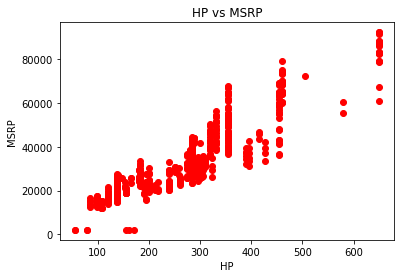

In [37]:
plt.scatter(X,y,color="red")
plt.title('HP vs MSRP')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

Since the range of Engine HP and MSRP is closer implementing Linear regression model to the new dataset

In [38]:
# Spliting into train & test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=15) 

 # Creating a regressior
regressor = LinearRegression()

# Fiting the dataset into the model
regressor.fit(X_train,y_train) 

LinearRegression()

Plotting the graph for training set

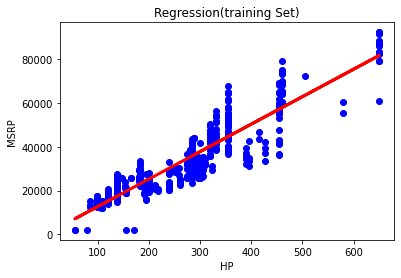

In [39]:
# Plot a graph with X_train vs y_train
plt.scatter(X_train,y_train,color="blue")

# Regressior line showing
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) 
plt.title('Regression(training Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

Plotting the graph for test set

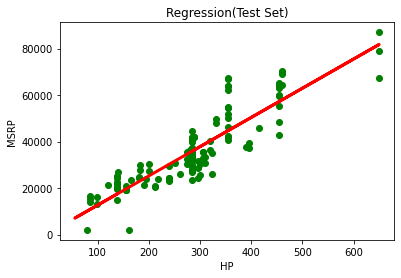

In [40]:
# Plot a graph with X_test vs y_test
plt.scatter(X_test,y_test,color="green") 

# Regressior line showing
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) 
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

Checking Model accuracy

In [41]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) # Priniting R2 Score
print('Mean squared Error :',mean_squared_error(y_test,y_pred)) # Priniting the mean error

R2 score: 0.78
Mean squared Error : 57159612.52263902


Function to predict car price

In [49]:
# A function to predict the price according to Horsepower
def car_price(hp): 
    result = regressor.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])
car_hp = int(input('Enter Chevorlet cars Horse Power : '))
print('This Chevorlet Prce will be : ',int(car_price(car_hp))*0.82,'€')

Enter Chevorlet cars Horse Power : 200
This Chevorlet Prce will be :  20718.12 €
